# LAB 04: Bipartite graphs and pathways

July 19th 2022

* This tutorial aims at helping you to handle bipartite graphs and pathways within a graph.
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, there are exercises for you.
* We recommend you to solve this lab until next tuesday (July 26st).

## Bipartite networks

A bipartite network is composed of two disjoint sets of nodes such that the links occur between a node of one set and a node from the other set.

In this tutorial we will:

* Build a bipartite network in which one set of vertices correspond to people (readers), and the other set of vertices correspond to books
* Insert edges indicating which book each person reads
* Draw the graph indicating each node with a different color
* Build the unipartite projected network of readers 
* Build the unipartite projected network of books (using networkx.algorithms.bipartite)
* Plot both projected graphs
* Obtain the adjacency matrix of the graph of books
* Compute the transition matrix



In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np

G = nx.Graph()

G.add_nodes_from(['Paul', 'Mary', 'John'], bipartite='reader')
G.add_nodes_from(['LOR', 'HP', 'Pinocchio', 'Don Quixote'], bipartite='book')
G.add_edges_from([['Paul', 'HP'], ['Paul', 'LOR'], ['Mary', 'HP'], 
                  ['Mary', 'Don Quixote'],
                 ['John', 'Pinocchio'], ['John', 'Don Quixote']])

readers = [node for node in G.nodes if G.nodes[node]['bipartite']=='reader']
books = [node for node in G.nodes if G.nodes[node]['bipartite']=='book']
colors = ['blue' if node in readers else 'red' for node in G.nodes]


nx.draw(G, with_labels=True, pos=nx.drawing.layout.bipartite_layout(G, readers), 
        node_color=colors)

R = nx.Graph()

for node in readers:
    for book in G.neighbors(node):
        for reader in G.neighbors(book):
            if node != reader and not R.has_edge(node, reader):
                R.add_edge(node, reader)

%matplotlib inline

nx.draw(R, with_labels=True)

R = bipartite.projected_graph(G, readers)
B = bipartite.projected_graph(G, books)

%matplotlib inline

nx.draw(B, with_labels=True)

A = nx.adjacency_matrix(B)

col_sums = np.sum(A, axis=0)

T = A/col_sums

%matplotlib inline




## Pathways 

* Build a graph that contains two connected components: one cycle (size 3) and two nodes connected to each other
* Test if the graph is connected and list the connected components
* Compute all shortest paths in the network
* Compute the number of pathways of size p
* Compute the clustering coefficient of each node in the network


Pathways between 0 and 1 [[0, 1]]
Pathways between 0 and 2 [[0, 2]]
Pathways between 1 and 2 [[1, 2]]
Pathways between 3 and 4 [[3, 4]]
[[2. 3. 3. 0. 0.]
 [3. 2. 3. 0. 0.]
 [3. 3. 2. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


{0: 1.0, 1: 1.0, 2: 1.0, 3: 0, 4: 0}

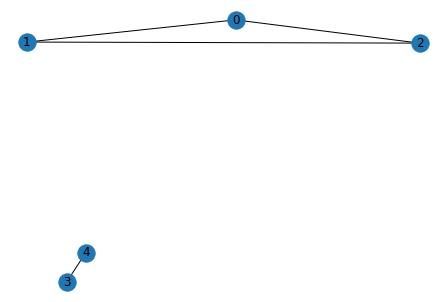

In [ ]:
G = nx.cycle_graph(3)

G.add_edge(3,4)

nx.draw(G, with_labels=True)

nx.is_connected(G)

components = list(nx.connected_components(G))

components

for component in components:
    for source in component:
        for target in component:
            if target > source:
                print('Pathways between', source, 'and', target, 
                      list(nx.all_shortest_paths(G, source, target)))
                
A = nx.adjacency_matrix(G)
p = 3

N_paths = np.eye(A.shape[0])
for cont in range(p):
    N_paths = N_paths@A
    
print(N_paths)

nx.clustering(G)



##  Exercise

Download the list of edges from: https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.edges.gz

* Build a graph from the downloaded file
* What is the diameter of the graph?
* What is the number of connected components?
* Is there any cycle in this network? If so, list them.
* List the bridges of the network
* Pick one bridge of the network. Then, make one plot with two subgraphs corresponding to the components connected by the bridge. Color nodes belonging to one component with one color and the other component with a different color.
* Build a histogram of the clustering coefficients of the network
* Compute the average clustering coefficient of the graph
* Compute the global clustering coefficient of the network

Number of connected components: 3
Average clustering coefficient: 0.4930453868822472
Global clustering coefficient: 0.3132922245160076


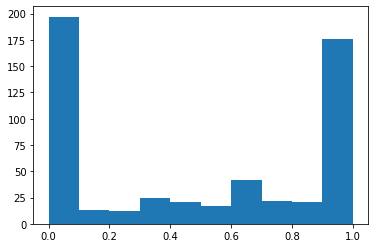

In [ ]:
import matplotlib.pyplot as plt

G = nx.read_edgelist('openflights_usa.edges')
components = list(nx.connected_components(G))

# Number of connected components
print("Number of connected components:", len(components))

# Cycles
cycles = nx.cycles.cycle_basis(G)

# Bridges
bridges = list(nx.bridges(G))

# Selectiong components connected by a bridge
bridge = bridges[0]
G2 = G.copy()
G2.remove_edge(bridge[0], bridge[1])
sel_components = [C for C in nx.connected_components(G2) 
                  if bridge[0] in C or bridge[1] in C]
S = G2.subgraph(sel_components[0].union(sel_components[1]))

colors = ['blue' if node in sel_components[0] else 'red' for node in S.nodes]

nx.draw(S, node_color=colors)

# Clustering coefficient

clust_coef = list(nx.clustering(G).values())

%matplotlib inline

plt.hist(clust_coef)

print("Average clustering coefficient:", nx.average_clustering(G))

# Global clustering coefficient

print("Global clustering coefficient:", nx.transitivity(G))